# Business Understanding

## Project Domain

Domain: Financial Time Series Forecasting

Proyek ini bertujuan untuk memprediksi harga saham harian Amazon menggunakan algoritma Recurrent Neural Network (RNN) berbasis data historis dari tahun 1997 hingga 2020. Model ini dikembangkan dalam konteks financial time series forecasting untuk mendukung pengambilan keputusan investasi.

## Goals

1. Mengembangkan model prediksi harga saham berbasis Recurrent Neural Network (RNN) menggunakan data historis saham Amazon dari tahun 1997 hingga 2020.

2. Mengidentifikasi pola pergerakan harga saham dengan memanfaatkan struktur berurutan dari data deret waktu.

3. Mengevaluasi performa model RNN dalam memprediksi harga penutupan (closing price) saham Amazon.

4. Membandingkan hasil prediksi dengan data aktual untuk menilai akurasi model.

## Solution Statements

Solusi yang ditawarkan dalam proyek ini adalah membangun model deep learning berbasis RNN (khususnya LSTM) untuk mempelajari hubungan temporal dalam data historis saham Amazon. Dataset akan diproses melalui tahapan cleaning, normalisasi, dan pembentukan sequence window, lalu digunakan untuk melatih model prediktif.

# Data Understanding

## Import data dari kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mhernanf","key":"5bf74f681d24b12de78db3cc8c3dee0b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d salmanfaroz/amazon-stock-price-1997-to-2020

Dataset URL: https://www.kaggle.com/datasets/salmanfaroz/amazon-stock-price-1997-to-2020
License(s): CC0-1.0


In [5]:
!mkdir amazon-stock-price-1997-to-2020
!unzip amazon-stock-price-1997-to-2020.zip -d amazon-stock-price-1997-to-2020
!ls amazon-stock-price-1997-to-2020

Archive:  amazon-stock-price-1997-to-2020.zip
  inflating: amazon-stock-price-1997-to-2020/Amazon.csv  
Amazon.csv


## Import Library yang dibutuhkan

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Exploratory Data Analysis

In [54]:
df = pd.read_csv('/content/amazon-stock-price-1997-to-2020.zip')

In [55]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5842 non-null   object 
 1   Open       5842 non-null   float64
 2   High       5842 non-null   float64
 3   Low        5842 non-null   float64
 4   Close      5842 non-null   float64
 5   Adj Close  5842 non-null   float64
 6   Volume     5842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 319.6+ KB


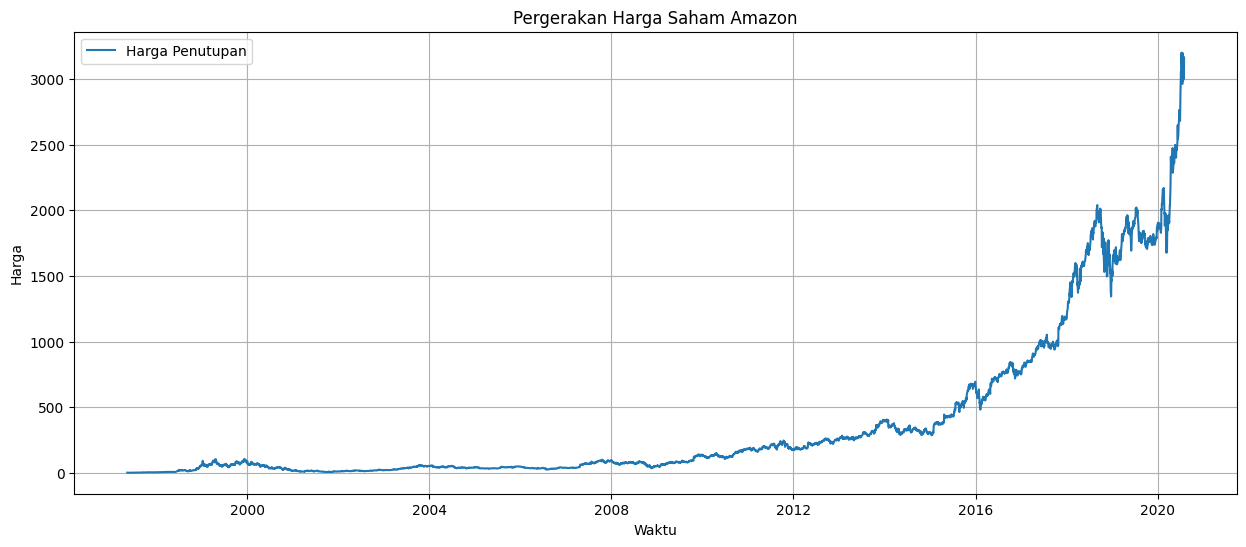

In [88]:
# prompt: membuat Plot Garis Harga Saham (Close Price)

import matplotlib.pyplot as plt
# Plot Garis Harga Saham (Close Price)
plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Harga Penutupan')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.title('Pergerakan Harga Saham Amazon')
plt.legend()
plt.grid(True)
plt.show()

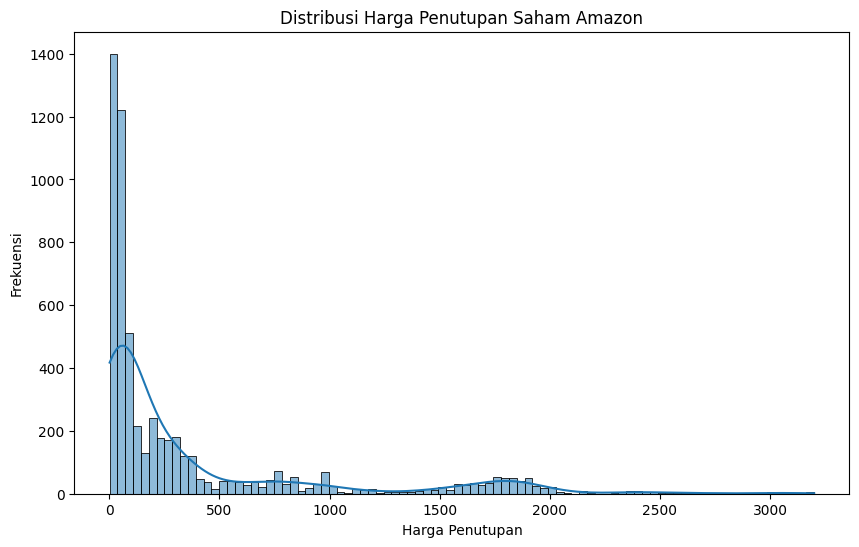

In [89]:
# prompt: Membuat Distribusi Harga Saham (Close)

import matplotlib.pyplot as plt
# Distribusi Harga Saham (Close)
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True)
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga Penutupan Saham Amazon')
plt.show()


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999911  0.999894  0.999808   0.999808 -0.233653
High       0.999911  1.000000  0.999848  0.999904   0.999904 -0.231953
Low        0.999894  0.999848  1.000000  0.999906   0.999906 -0.235328
Close      0.999808  0.999904  0.999906  1.000000   1.000000 -0.233541
Adj Close  0.999808  0.999904  0.999906  1.000000   1.000000 -0.233541
Volume    -0.233653 -0.231953 -0.235328 -0.233541  -0.233541  1.000000


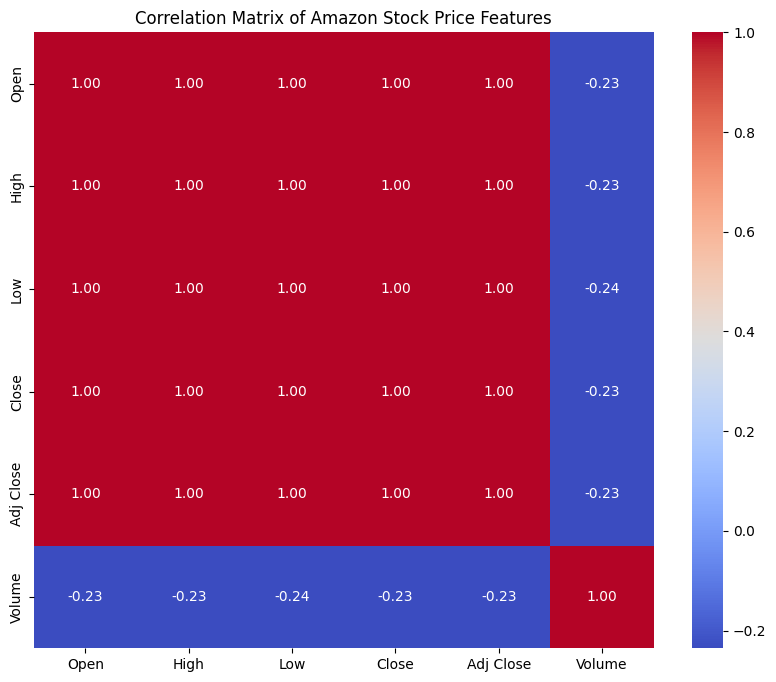

In [90]:
# prompt: Membuat Korelasi antar Variabel

import matplotlib.pyplot as plt
# Calculate correlations between numerical features
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Amazon Stock Price Features')
plt.show()


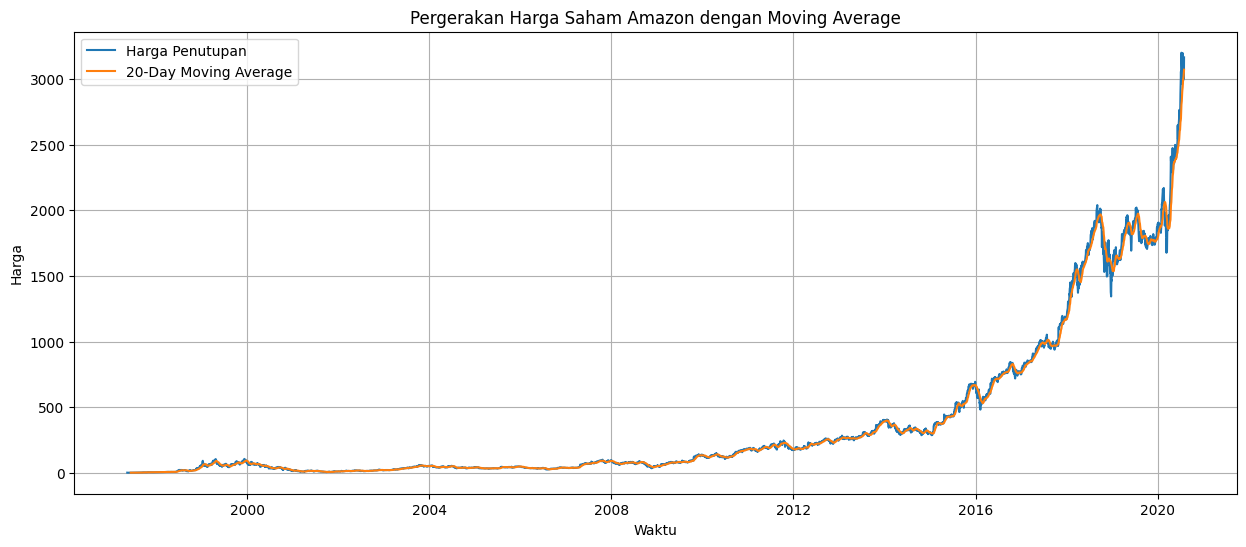

In [91]:
# prompt: membuat Moving Average (Trend Smoothing)

import matplotlib.pyplot as plt
# Calculate the moving average
window_size = 20  # You can adjust the window size as needed
df['MA'] = df['Close'].rolling(window=window_size).mean()

# Plot the original closing price and the moving average
plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Harga Penutupan')
plt.plot(df['MA'], label=f'{window_size}-Day Moving Average')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.title('Pergerakan Harga Saham Amazon dengan Moving Average')
plt.legend()
plt.grid(True)
plt.show()


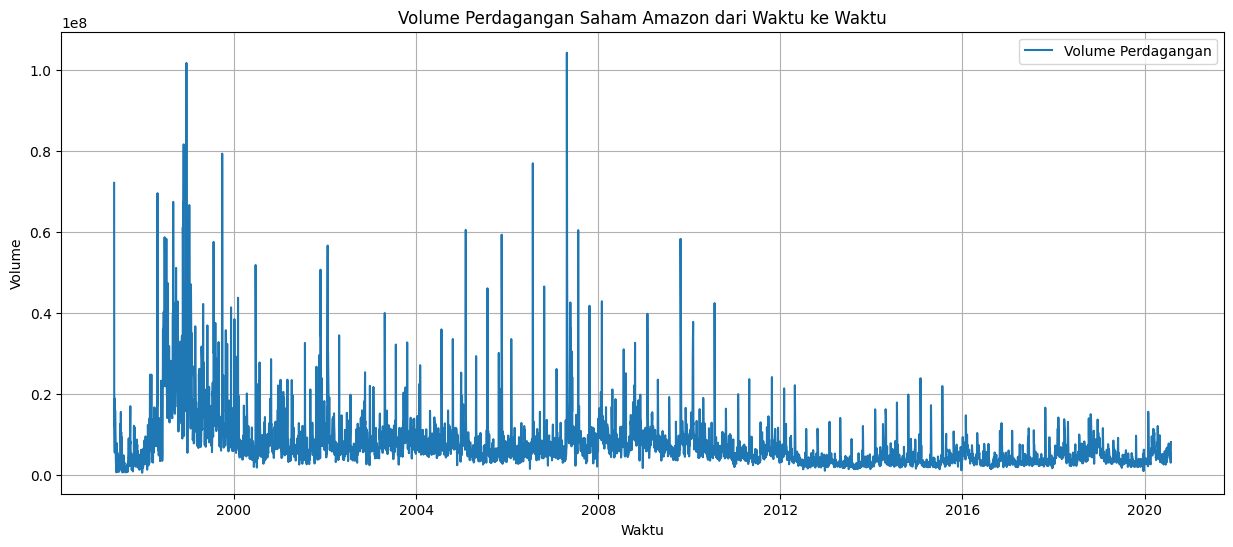

In [92]:
# prompt: membuat Volume Perdagangan dari Waktu ke Waktu

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame as defined in the previous code.

# Calculate the trading volume over time
plt.figure(figsize=(15, 6))
plt.plot(df['Volume'], label='Volume Perdagangan')
plt.xlabel('Waktu')
plt.ylabel('Volume')
plt.title('Volume Perdagangan Saham Amazon dari Waktu ke Waktu')
plt.legend()
plt.grid(True)
plt.show()


# Data Preparation

In [57]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [58]:
data = df[['Close']].copy()

In [59]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [60]:
def create_sequences(data, window_size):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

window_size = 60
x, y = create_sequences(scaled_data, window_size)

In [61]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [62]:
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Modeling

In [63]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 5.1407e-04 - val_loss: 0.0010
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 3.1174e-05 - val_loss: 4.7689e-04
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 3.1028e-05 - val_loss: 7.6078e-04
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 2.8435e-05 - val_loss: 5.4916e-04
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 2.6940e-05 - val_loss: 5.0693e-04
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 2.2168e-05 - val_loss: 3.9590e-04
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 2.0422e-05 - val_loss: 3.5143e-04
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 1.8976e-05 - val_loss: 4.8039e-04
Epoch 9/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 2.1745e-05 - val_loss: 0.0015
Epoch 10/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 1.9698e-05 - val_loss: 4.9887e-04
Epoch 11/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/s

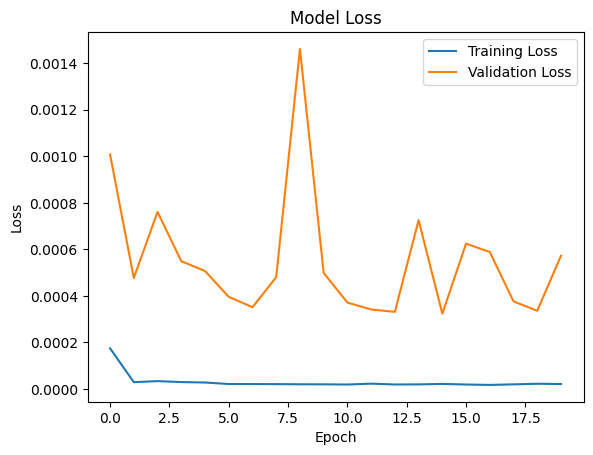

In [65]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [66]:
y_pred = model.predict(x_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [67]:
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 76.54253446860737
MAE: 58.88044721624824


In [68]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

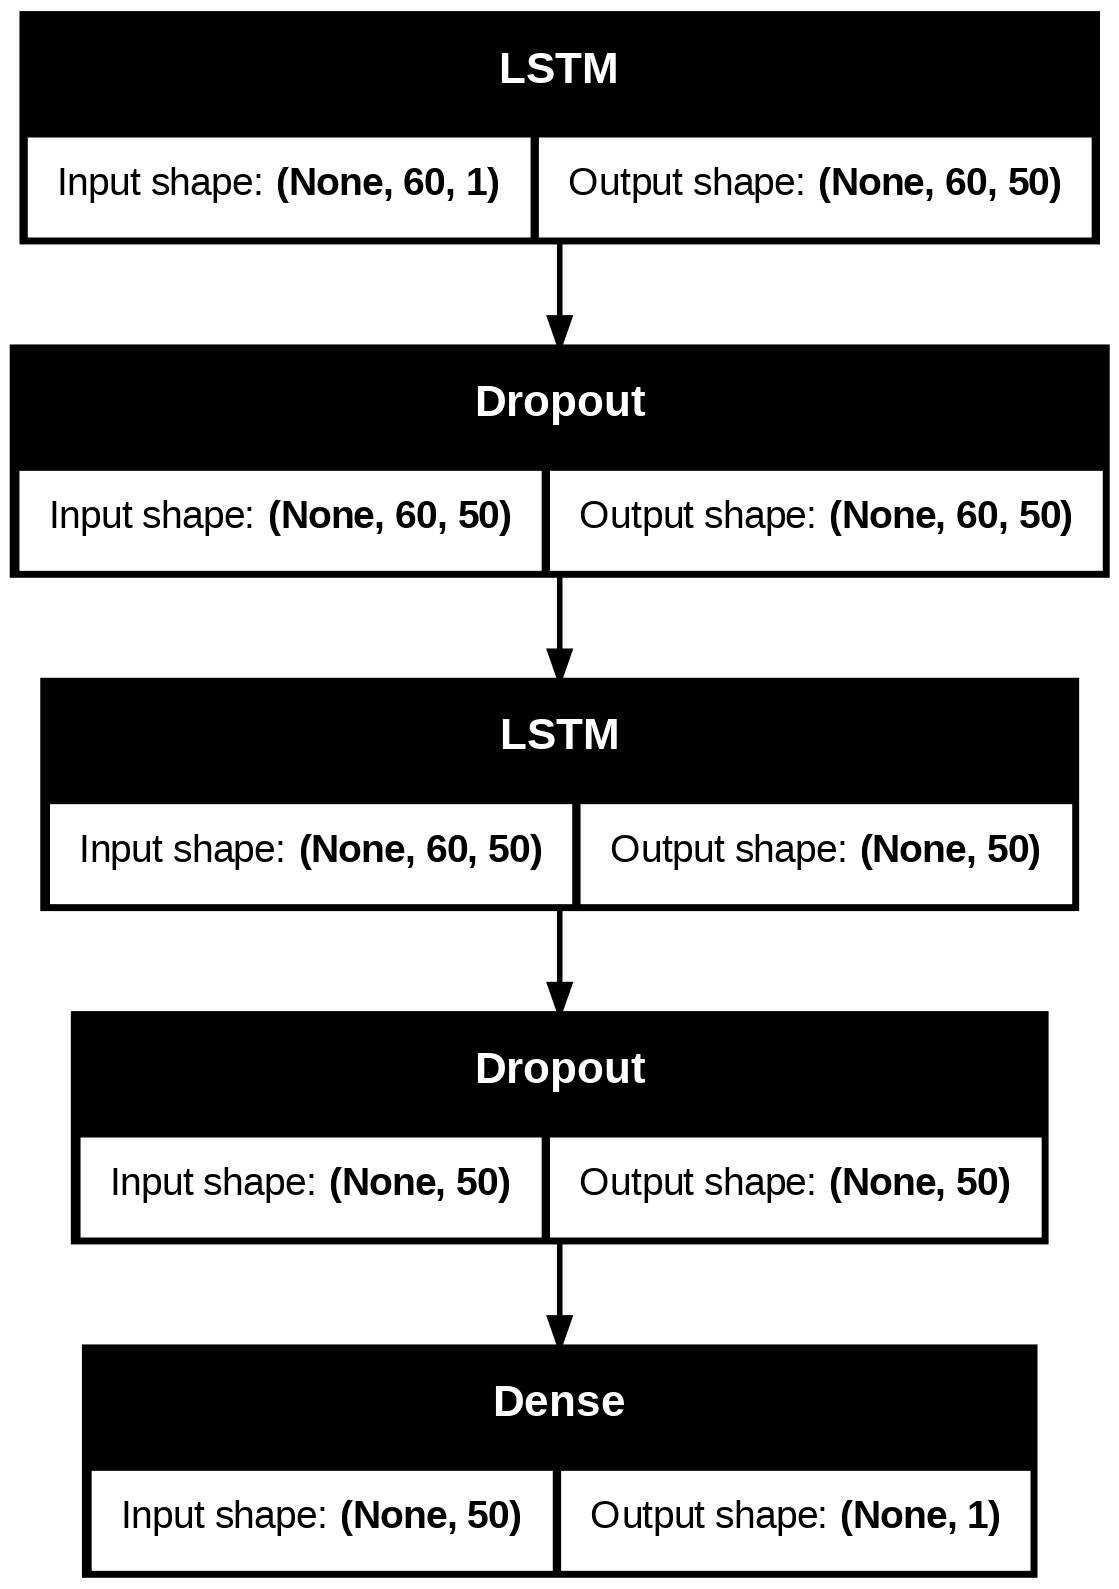

In [69]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

# Evaluation

In [70]:
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 4.08%


In [71]:
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Root Mean Squared Error (RMSE): 76.5425
Mean Absolute Error (MAE): 58.8804


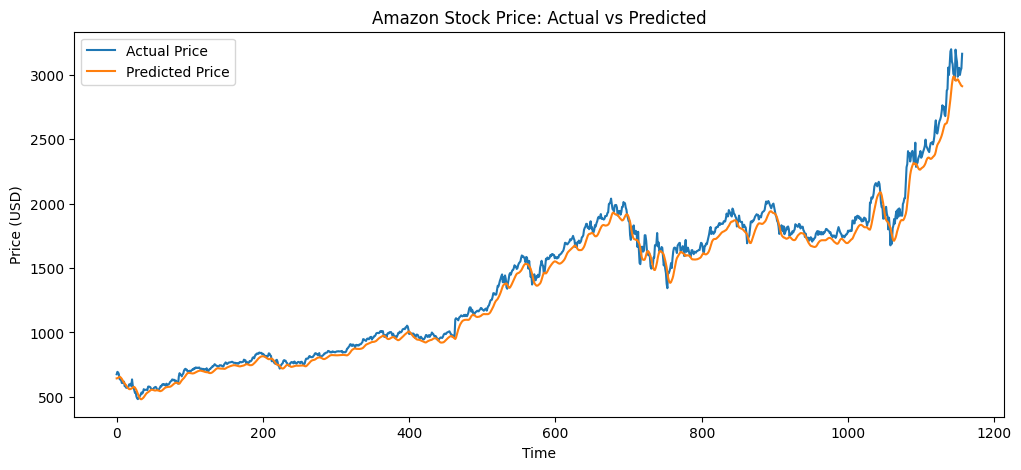

In [72]:
plt.figure(figsize=(12,5))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(y_pred_rescaled, label='Predicted Price')
plt.title('Amazon Stock Price: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

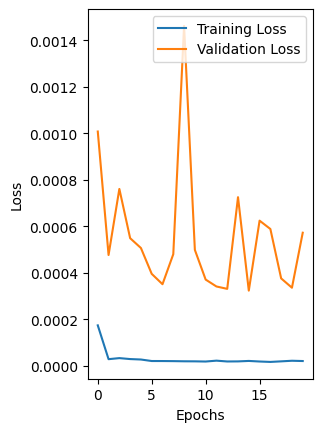

In [73]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Deployment

## Model Simulation

In [74]:
# Ambil 60 data terakhir dari dataset
last_60_days = scaled_data[-60:]  # Sudah dinormalisasi

# Bentuk input sesuai format LSTM (1 sampel, 60 time steps, 1 fitur)
x_input = np.reshape(last_60_days, (1, 60, 1))

# Prediksi harga berikutnya (dalam skala normalisasi)
predicted_scaled = model.predict(x_input)

# Kembalikan ke skala harga asli
predicted_price = scaler.inverse_transform(predicted_scaled)

print(f"Prediksi harga saham untuk hari berikutnya: ${predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Prediksi harga saham untuk hari berikutnya: $2924.75


In [75]:
n_days = 7
future_predictions = []
current_input = list(last_60_days.flatten())

for _ in range(n_days):
    input_seq = np.array(current_input[-60:]).reshape(1, 60, 1)
    next_pred = model.predict(input_seq)[0][0]
    future_predictions.append(next_pred)
    current_input.append(next_pred)

# Invers transform hasil prediksi
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Tampilkan hasil
for i, price in enumerate(future_prices):
    print(f"Hari ke-{i+1} prediksi harga: ${price[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Hari ke-1 prediksi harga: $2924.75
Hari ke-2 prediksi harga: $2918.22
Hari ke-3 prediksi harga: $2901.45
Hari ke-4 prediksi harga: $2878.66
Hari ke-5 prediksi harga: $2852.44
Hari ke-6 prediksi harga: $2824.34
Hari ke-7 prediksi harga: $2795.30


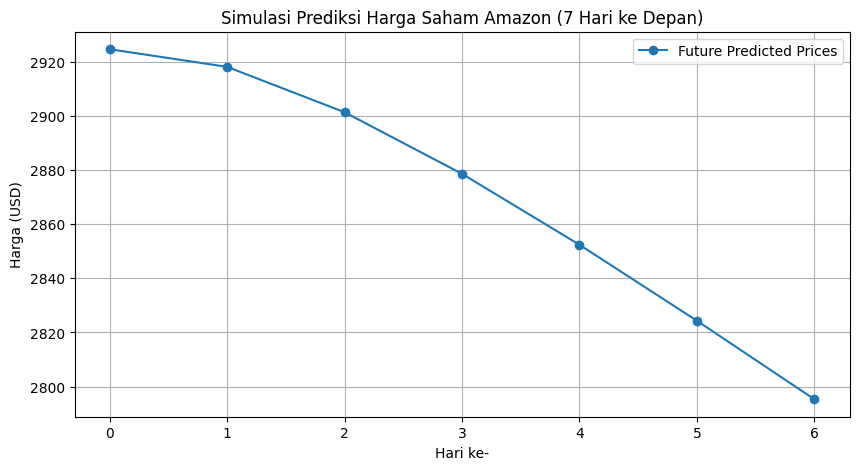

In [76]:
plt.figure(figsize=(10,5))
plt.plot(future_prices, marker='o', label='Future Predicted Prices')
plt.title('Simulasi Prediksi Harga Saham Amazon (7 Hari ke Depan)')
plt.xlabel('Hari ke-')
plt.ylabel('Harga (USD)')
plt.grid(True)
plt.legend()
plt.show()

## Save Model

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(10, input_shape=(60, 1), activation='tanh'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Dummy fit biar bisa disimpan
import numpy as np
x_dummy = np.random.rand(10, 60, 1)
y_dummy = np.random.rand(10, 1)
model.fit(x_dummy, y_dummy, epochs=1)

# Convert
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1938
Saved artifact at '/tmp/tmpfapjxnz4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 60, 1), dtype=tf.float32, name='keras_tensor_64')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139447587874256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447587871952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447587871376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447587873104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139447587870992: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [85]:
# prompt: Simpan label encoder dan scaler

import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']